In [118]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pylab as plt
from collections import namedtuple
import random
import seaborn as sns
import itertools

In [16]:
def generate_forest(n, p):
    """Make forest of size nxn with probability p"""
    return (np.random.rand(n, n) < p).astype(int)

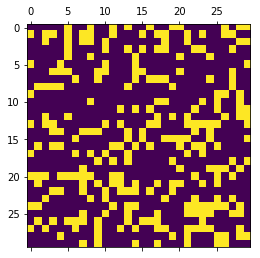

In [29]:
example_forest = generate_forest(30, 0.3)
plt.matshow(example_forest)

In [22]:
Point = namedtuple('Point', ('x', 'y'))

In [139]:
def neighbors(xy: Point, forest):
    w, h = forest.shape
    neighs =[
        Point((xy.x + 1) % w, xy.y),
        Point((xy.x - 1) % w, xy.y),
        Point(xy.x, (xy.y + 1) % h),
        Point(xy.x, (xy.y - 1) % h),
    ]
    
    return [n for n in neighs if forest[n.x, n.y]]

In [141]:
def calc_eccentricity(xy: Point, forest):
    """Return the eccentricity of point xy"""
    seen = set()
    boundary = []
    next_boundary = [xy]
    iters = 0
    while next_boundary:
        boundary = next_boundary
        next_boundary = []
        
        for cur in boundary:
            seen.add(cur)
            for neigh in (n for n in neighbors(cur, forest) if n not in seen):
                next_boundary.append(neigh)
        iters += 1
    return iters - 1

In [142]:
np.array([[1, 1], [1, 1]])

array([[1, 1],
       [1, 1]])

In [143]:
calc_eccentricity(Point(0, 0), np.array([[1, 1], [1, 1]]))

2

In [144]:
def burn_forest(n, p):
    """Returns eccenctricity for a random point in an nxn forest with tree probability p"""
    forest = generate_forest(n, p)
    trees = list(zip(*np.where(forest == 1)))
    if not trees:
        return 0
    xy = Point(*random.choice(trees))
    return calc_eccentricity(xy, forest)

In [152]:
M = 100
ps = np.arange(0, 1, 1.0 / M)
results_mean = np.zeros(M)
results_std = np.zeros(M)

In [153]:
nIters = 200
for i, p in enumerate(ps):
    print(i, p)
    iter_results = [burn_forest(10, p) for _ in range(nIters)]
    results_mean[i] = np.mean(iter_results)
    results_std[i] = np.std(iter_results)

0 0.0
1 0.01
2 0.02
3 0.03
4 0.04
5 0.05
6 0.06
7 0.07
8 0.08
9 0.09
10 0.1
11 0.11
12 0.12
13 0.13
14 0.14
15 0.15
16 0.16
17 0.17
18 0.18
19 0.19
20 0.2
21 0.21
22 0.22
23 0.23
24 0.24
25 0.25
26 0.26
27 0.27
28 0.28
29 0.29
30 0.3
31 0.31
32 0.32
33 0.33
34 0.34
35 0.35
36 0.36
37 0.37
38 0.38
39 0.39
40 0.4
41 0.41
42 0.42
43 0.43
44 0.44
45 0.45
46 0.46
47 0.47
48 0.48
49 0.49
50 0.5
51 0.51
52 0.52
53 0.53
54 0.54
55 0.55
56 0.56
57 0.57
58 0.58
59 0.59
60 0.6
61 0.61
62 0.62
63 0.63
64 0.64
65 0.65
66 0.66
67 0.67
68 0.68
69 0.69
70 0.7
71 0.71
72 0.72
73 0.73
74 0.74
75 0.75
76 0.76
77 0.77
78 0.78
79 0.79
80 0.8
81 0.81
82 0.82
83 0.83
84 0.84
85 0.85
86 0.86
87 0.87
88 0.88
89 0.89
90 0.9
91 0.91
92 0.92
93 0.93
94 0.94
95 0.95
96 0.96
97 0.97
98 0.98
99 0.99


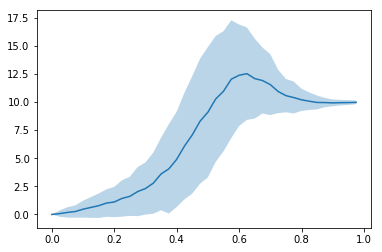

In [151]:
plt.fill_between(ps, results_mean + results_std, results_mean - results_std, alpha=0.3)
plt.plot(ps, results_mean)

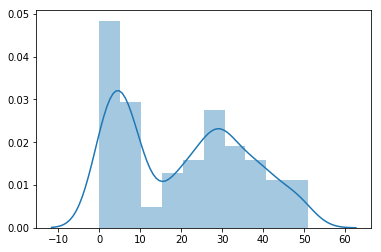

In [149]:
example_forest = generate_forest(30, 0.5)
eccs = []
for x, y in itertools.product(range(0, 30), range(0, 30)):
    eccs.append(calc_eccentricity(Point(x, y), example_forest))
sns.distplot(eccs)